# CH4

## 4.1 영화 리뷰 분류: 이진 분류 문제

4-1 IMDB 데이터셋 로드하기

In [1]:
from tensorflow.keras.datasets import imdb

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [7]:
# 첫번째 리뷰 단어 인덱스의 리스트
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
# 긍정 리뷰
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

4-2 리뷰를 다시 텍스트로 디코딩하기

In [10]:
word_index = imdb.get_word_index()  # word_index는 단어와 정수 인덱스를 제공한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]  # 정수 인덱스와 단어를 매핑하도록 뒤집기
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]  # 리뷰 디코딩: 0 = 패딩, 1 = 문서시작, 2 = 사전에 없음 예약되어 있으므로 인덱스에서 3 빼기
)

1641221/1641221 [==============================] - 0s 0us/step


In [11]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

4-3 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기

In [13]:
import numpy as np

In [15]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))  # 크기 (len(sequences), dimension)이고 모두 원소 0인 행렬
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train = vectorize_sequences(train_data)  # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)  # 테스트 데이터를 벡터로 변환

In [17]:
# multi-hot encoding된 벡터
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

4-4 모델 정의하기

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

4-5 모델 컴파일하기

In [21]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

4-6 검증 세트 준비하기

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

4-7 모델 훈련하기

In [23]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 11s 334ms/step - loss: 0.6239 - accuracy: 0.6097 - val_loss: 0.5577 - val_accuracy: 0.8256
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.4841 - accuracy: 0.8415 - val_loss: 0.4359 - val_accuracy: 0.8658
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3615 - accuracy: 0.8977 - val_loss: 0.3514 - val_accuracy: 0.8770
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2718 - accuracy: 0.9201 - val_loss: 0.3113 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2143 - accuracy: 0.9364 - val_loss: 0.2879 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1746 - accuracy: 0.9471 - val_loss: 0.2817 - val_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.1474 - accuracy: 0.9543 - val_loss: 0.2841 - val_accuracy: 0.8861
Epoch 8/20


In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

4-8 훈련과 검증 손실 그리기

In [25]:
import matplotlib.pyplot as plt

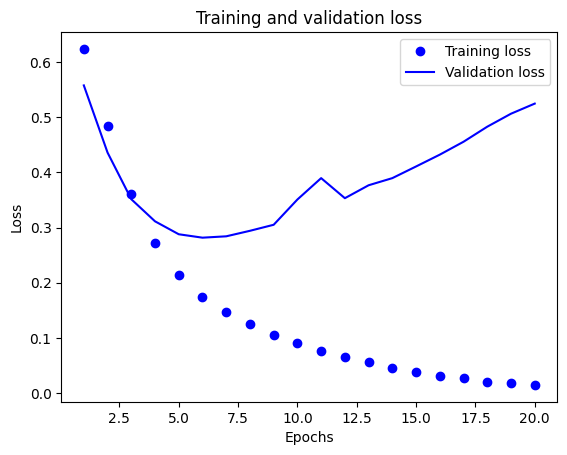

In [27]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")  # bo: 파란색 점 - train loss
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  # b: 파란색 실선 - valid loss
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

4-9 훈련과 검증 정확도 그리기

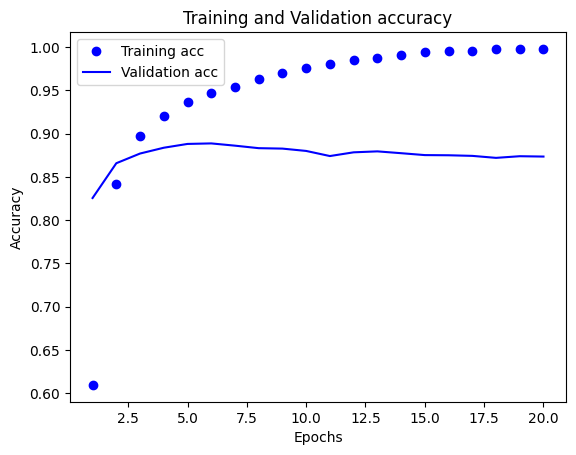

In [28]:
plt.clf()  # 그래프 초기화
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4-10 모델을 처음부터 다시 훈련하기

In [29]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

추가 실험

- 여기에서 최종 분류 층에서 이전에 2개의 표현층 사용, 1개 또는 3개의 표현 층을 사용하고 검증과 테스트의 정확도에 어떤 영향 미치는지

In [30]:
# 1개의 층
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [32]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [35]:
history1 = model1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 65ms/step - loss: 0.0464 - accuracy: 0.9928 - val_loss: 0.3912 - val_accuracy: 0.8753
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0430 - accuracy: 0.9933 - val_loss: 0.3988 - val_accuracy: 0.8729
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0394 - accuracy: 0.9947 - val_loss: 0.4292 - val_accuracy: 0.8650
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0364 - accuracy: 0.9954 - val_loss: 0.4248 - val_accuracy: 0.8705
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0348 - accuracy: 0.9954 - val_loss: 0.4317 - val_accuracy: 0.8737
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0306 - accuracy: 0.9967 - val_loss: 0.4437 - val_accuracy: 0.8725
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0294 - accuracy: 0.9973 - val_loss: 0.4590 - val_accuracy: 0.8722
Epoch 8/20
30

2개의 층일 때보다 검증 정확도가 떨어지는 것으로 확인된다.

In [38]:
# 3개의 층
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [39]:
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [40]:
history2 = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5338 - accuracy: 0.7743 - val_loss: 0.4020 - val_accuracy: 0.8539
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3111 - accuracy: 0.8977 - val_loss: 0.3072 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2235 - accuracy: 0.9251 - val_loss: 0.2806 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1842 - accuracy: 0.9351 - val_loss: 0.3181 - val_accuracy: 0.8732
Epoch 5/20
30/30 [==============================] - 2s 69ms/step - loss: 0.1483 - accuracy: 0.9495 - val_loss: 0.2927 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1248 - accuracy: 0.9581 - val_loss: 0.3023 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1033 - accuracy: 0.9669 - val_loss: 0.3290 - val_accuracy: 0.8775
Epoch 8/20
30

3개의 층이 1개, 2개, 3개에서 3개의 층이 가장 검증 정확도가 떨어진다.

- 층의 유닛을 추가하거나 줄여보세요, 32개의 유닛, 64개의 유닛 등

In [41]:
# 32개의 유닛
model3 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [42]:
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [43]:
history3 = model3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.5169 - accuracy: 0.7669 - val_loss: 0.3658 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3005 - accuracy: 0.8974 - val_loss: 0.3732 - val_accuracy: 0.8397
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2257 - accuracy: 0.9181 - val_loss: 0.3579 - val_accuracy: 0.8524
Epoch 4/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1884 - accuracy: 0.9325 - val_loss: 0.2846 - val_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1526 - accuracy: 0.9487 - val_loss: 0.3233 - val_accuracy: 0.8712
Epoch 6/20
30/30 [==============================] - 2s 70ms/step - loss: 0.1278 - accuracy: 0.9573 - val_loss: 0.3603 - val_accuracy: 0.8693
Epoch 7/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1107 - accuracy: 0.9630 - val_loss: 0.3256 - val_accuracy: 0.8772
Epoch 8/20
30

검증 정확도가 상대적으로 좋아졌지만 아직 2개의 층 16개의 유닛보다는 낮다.

In [44]:
# 64개의 유닛
model4 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [45]:
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [46]:
history4 = model4.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 124ms/step - loss: 0.5063 - accuracy: 0.7484 - val_loss: 0.4344 - val_accuracy: 0.8000
Epoch 2/20
30/30 [==============================] - 3s 89ms/step - loss: 0.2937 - accuracy: 0.8895 - val_loss: 0.2864 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2276 - accuracy: 0.9133 - val_loss: 0.2872 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 2s 67ms/step - loss: 0.1851 - accuracy: 0.9285 - val_loss: 0.2785 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 2s 67ms/step - loss: 0.1421 - accuracy: 0.9498 - val_loss: 0.2948 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1309 - accuracy: 0.9525 - val_loss: 0.3132 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 3s 87ms/step - loss: 0.0971 - accuracy: 0.9667 - val_loss: 0.3474 - val_accuracy: 0.8803
Epoch 8/20
3

원래의 모델보다 검증 정확도는 높아졌지만 검증손실은 더 나아지지 못했다.   

- binary_crossentropy 대신 mse 손실 함수 사용

In [47]:
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [48]:
model5.compile(optimizer="rmsprop",
              loss="mse",  # binary_crossentropy
              metrics=["accuracy"])

In [49]:
history5 = model5.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 81ms/step - loss: 0.1905 - accuracy: 0.7604 - val_loss: 0.1401 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1158 - accuracy: 0.8825 - val_loss: 0.1089 - val_accuracy: 0.8722
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0859 - accuracy: 0.9092 - val_loss: 0.1002 - val_accuracy: 0.8720
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0706 - accuracy: 0.9241 - val_loss: 0.0874 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0598 - accuracy: 0.9355 - val_loss: 0.0847 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0521 - accuracy: 0.9430 - val_loss: 0.0949 - val_accuracy: 0.8701
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0460 - accuracy: 0.9524 - val_loss: 0.0908 - val_accuracy: 0.8786
Epoch 8/20
30

loss를 binary_crossentropy 대신 mse로 계산했을 때 상대적인 숫자가 줄어든 것을 볼 수 있다.

- relu 대신 tanh 활성화함수(초기 신경망에서 인기 있었던 함수) 사용

In [50]:
model6 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [51]:
model6.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [52]:
history6 = model6.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 83ms/step - loss: 0.4687 - accuracy: 0.8015 - val_loss: 0.3745 - val_accuracy: 0.8468
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2790 - accuracy: 0.9007 - val_loss: 0.2852 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2029 - accuracy: 0.9280 - val_loss: 0.2702 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1574 - accuracy: 0.9457 - val_loss: 0.3393 - val_accuracy: 0.8701
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1281 - accuracy: 0.9551 - val_loss: 0.3233 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1085 - accuracy: 0.9625 - val_loss: 0.3287 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0845 - accuracy: 0.9713 - val_loss: 0.3557 - val_accuracy: 0.8780
Epoch 8/20
30

relu 대신 tanh로 했을 때 검증정확도가 relu로 했을 때보다 낮고 검증 손실이 relu로 했을 때보다 높아 relu가 성능이 더 나은 것으로 볼 수 있다.